# Week 2 Lab: Assembly
## Prelab 1

**Due: Monday 4/15/19 11:59PM**

For this prelab, we'll derive how to estimate the size of a genome based on kmer frequencies using a toy example. In tomorrow's lab, we'll do this on a real genome.

You may work with a partner or consult your classmates for help!

## 1. Intro to kmer counts and coverage

First, let's consider kmers originating from $N$ copies of an example genome ($G$) of length $|G|=15$.

In [ ]:
GENOME="ACTCGGCGTTACGCG"

**Question 1 (1 pt)**: How many unique kmers of length 7 can be generated from our genome? List them

Unique kmers calculated by G-kmer_length+1

For our example this is 15-7+1 = 9

**Question 2 (1 pt)**: What would your answer to question 1 (number of unique 7-mers) be for a genome of length 100? 1000? 1000000? Provide the answer as well as a general formula to compute the number of possible kmers. Note, as the genome size gets much bigger than the kmer size, the number of total kmers seen forms a good approximation to the genome size. 

(Note, your formula should involve $|G|$ and $k$. Ignore the possibility that a single kmer may be seen more than once in the genome. Although note that does not often hold in real genomes and depends on kmer size).

Formula for calculating unique kmers (same as above): |G| - kmer_length + 1 <br>
Above formula does not account for repeats of specific kmers.

For |G| = 100 -> 100-7+1 = 94 <br>
For |G| = 1000 -> 1000-7+1 = 994 <br>
For |G| = 1,000,000 -> 1,000,000-7+1 = 999,994 <br>


**Question 3 (1 pt)**: We decide to sequence our genome with 100 reads of length ($L$) 7bp. What will be the average coverage ($C$) of our length 15 genome above? Recall that *coverage* refers to the average number of times each base pair in the genome is sequenced. (see the formula for coverage from last week.)

Average coverage (C) = total number of bases read/genome length

C = (100 reads) * (7 read length) / (15 genome length) = 700/15 = 46.667

We can also consider the *kmer coverage* ($M$), or the average number of times each *kmer* of a given length is seen. For example, if we have reads of length $L=7$, and are using $k=7$, then we will sequence a single kmer for each read. If we know the total number of possible kmers (your answer to question 2), the we can compute $M$ as the total number of kmers seen divided by the total number of possible kmers. 

**Question 4 (1 pt)**: Continuing our example from question 3, with $N=100$ reads of length $L=7$ and $|G|=15$, what will be the average *kmer coverage*?

M = kmer coverage (avg number of times each kmer is seen) = total kmers seen/total possible kmers

M = (# reads) * (# kmers per read) / (# of possible kmers) = (100) * (7-7+1) / (15-7+1) = 100/9 = 11.111

**Question 5 (1 pt)**: What about if read length $L=10$? How many kmers of length $k=7$ will we observe per read? What will be the average kmer coverage with 100 reads for a genome of length 15?

Number of length 7 kmers per read = 10 - 7 + 1 = 4

M = (# reads) * (# kmers per read) / (# of possible kmers) = (100) * (10-7+1) / (15-7+1) = 400/9 = 44.444

Now let's write some code to check our answers.

**Question 6 (2 pts)**: Complete the code below, which generates $N$ reads of length $L$ from an example genome $G$ and plots a histogram of kmer counts for a given length $k$.

You will need to fill in the functions:
* `GetKmersFromReads`: which gets a list of all kmers of a given length observed in the reads
* `GetMeanKmerCov`: which computes the mean kmer coverage ($M$) based on the read length $L$, kmer size $k$, and number of reads $N$. 

The code will create a histogram of kmer counts. If your result for `GetMeanKmerCov` is correct it should be around the mean value of the histogram.

Populating the interactive namespace from numpy and matplotlib


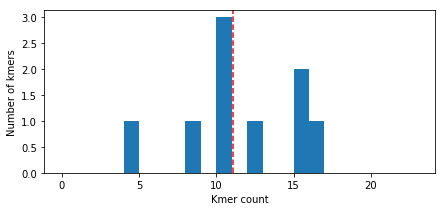

In [20]:
%pylab inline

GENOME="ACTCGGCGTTACGCG"
k = 7
N = 100
L = 7

def GetReads(GENOME, N, L):
    """
    Return a list of N reads of length L from a GENOME string
    """
    reads = []
    for i in range(N):
        start = random.randint(0, len(GENOME)-L+1)
        reads.append(GENOME[start:start+L])
    return reads

def GetKmersFromReads(reads, k):
    """
    Return a list of all kmers of length k from a list of reads
    """
    kmers = []
    for read in reads:
        for i in range(len(read)-k+1):
            # Get the kmer starting at index i and add to the list of kmers
            kmers.append(read[i:i+k])
    return kmers

def GetKmerCounts(kmer_list):
    """
    Count the number of times each unique kmer occurs.
    Should return a dictionary with kmer_counts[kmer] = number of times the 
    kmer is seen in kmer_list
    """
    kmer_counts = {}
    for kmer in kmer_list:
        kmer_counts[kmer] = kmer_counts.get(kmer, 0) + 1
    return kmer_counts

def GetMeanKmerCov(GENOME, N, k, L):
    num_kmers_seq = 0 # Set this below
    num_kmers_uniq = -1 # Set this below
    # Set num_kmers_seq and num_kmers_uniq based on the formulas above
    # num_kmers_seq is the total number of kmers sequenced
    num_kmers_seq = N*(L-k+1)
    # num_kmers_uniq is the number of unique kmers in GENOME (assuming all are unique)
    num_kmers_uniq = len(GENOME)-k+1

    return num_kmers_seq*1.0/num_kmers_uniq

def PlotKmerHist(kmer_counts, meanval=None):
    fig = plt.figure()
    fig.set_size_inches((7, 3))
    ax = fig.add_subplot(111)
    vals = list(kmer_counts.values())
    bins = np.arange(0, max(vals)*1.5, 1)
    ax.hist(vals, bins=bins)
    if meanval is not None: ax.axvline(x=meanval, linestyle="dashed", color="red")
    ax.set_xlabel("Kmer count")
    ax.set_ylabel("Number of kmers")
    
reads = GetReads(GENOME, N, L)
kmer_list = GetKmersFromReads(reads, k)
kmer_counts = GetKmerCounts(kmer_list)
PlotKmerHist(kmer_counts, meanval=GetMeanKmerCov(GENOME, N, k, L))

In [22]:
"""Test GetKmersFromReads"""
GENOME="ACTCGGCGTTACGCG"
k = 7
N = 100
L = 7
reads = GetReads(GENOME, N, L)
kmer_list = GetKmersFromReads(reads, k)
assert(len(kmer_list)==N)

k = 7
N = 100
L = 10
reads = GetReads(GENOME, N, L)
kmer_list = GetKmersFromReads(reads, k)

In [23]:
GetMeanKmerCov(GENOME, N, k, L)

44.44444444444444

In [24]:
"""Test GetMeanKmerCov"""
GENOME="ACTCGGCGTTACGCG"
k = 7
N = 100
L = 7

k = 5
N = 1000
L = 10

Now let's take a look at kmer histograms for larger genomes to get a feel for what this will look like in real data. Feel free to copy the code below to a new cell to play around with the parameters. You can also use this to make sure your estimate fo the mean kmer coverage is correct.

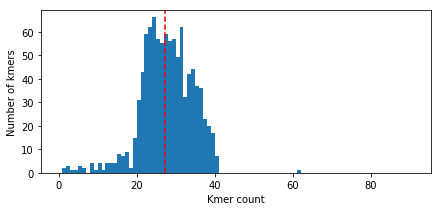

In [25]:
# Generate a random genome of 1kb
nucs = ["A","C","G","T"]
genome_size = 1000
GENOME = ''.join([nucs[random.randint(0, 4)] for  i in range(genome_size)])

# Set real-world kmer size and read length
k = 10
L = 36
N = 1000

reads = GetReads(GENOME, N, L)
kmer_list = GetKmersFromReads(reads, k)
kmer_counts = GetKmerCounts(kmer_list)
PlotKmerHist(kmer_counts, meanval=GetMeanKmerCov(GENOME, N, k, L))

## 2. Estimating genome size from kmer histograms

We'd like to be able to estimate the size of a genome just based on the observed reads. It turns out we can leverage kmer histograms to solve this problem.

After completing the exercise a bove, we now know how to compute *kmer coverage* ($M$: average number of times each kmer is seen) and *sequencing coverage* ($C$: average number of times each base pair is sequenced) as a function of:

* $G$: the size of the genome
* $N$: the number of reads
* $L$: the length of the read
* $k$: the size of the kmer

Rearrange your formula for kmer coverage ($M$) to solve for $G$. Note, since in most settings $G-k+1$ is very close to $G$, you can replace wherever that term occurs in your formula with $G$ to simplify. That is, assume $G-k+1 \approx G$.

**Question 7 (1 pt)** Report your formula for computing genome size as a function of number of reads ($N$), read length ($L$), kmer size ($k$), and observed peak location in the kmer histogram ($M$). Based on the observed kmer histogram above (for a genome of length 1000 with kmer size 10 and 1,000 reads of length 36), what would you estimate the genome size to be based on the peak of the histogram ($M$), and other given parameters? Does it match what you expect (1000bp)? Since it can be difficult to precisely estimate the peak location, you can give a range. Explain how you arrived at your estimate.

M = (#reads) * (#kmers per read) / (#kmers in genome)

M = (N) * (L-K+1) / (G-k+1) ~= (N) * (L-K+1) / (G)

Solving for G we get:

Formula for computing genome size (G) = N*(L-K+1)/M

The peak is roughly between 25 and 30 <br>
1000*(36-10+1)/25 = 1080

1000*(36-10+1)/27 = 1000

1000*(36-10+1)/30 = 900

The estimates match the correct range of what we would expect the genome length to be. These estimates are found using the above formula as well as visual estimation of the mean of the histogram shown above.

## 3. Kmer histograms for real data

In real data, our kmer histograms get slightly more complicated since we have sequencing errors. 

**Question 8 (1 pt)**: Modify the code below to introduce random errors into your reads at a rate of 0.1%.

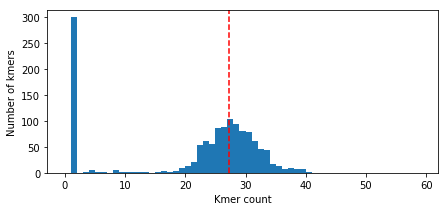

In [211]:
nucs = ["A","C","G","T"]
genome_size = 1000
GENOME = ''.join([nucs[random.randint(0, 4)] for  i in range(genome_size)])

# Set real-world kmer size and read length
k = 10
L = 36
N = 1000
error_rate = 0.001

def GetReadsWithErrors(GENOME, N, L, error_rate):
    """
    Return a list of N reads of length L from a GENOME string
    Generate random errors with probability error_rate 
    """
    nucs = ["A","C","G","T"]
    reads = []
    for i in range(N):
        start = random.randint(0, len(GENOME)-L+1)
        read = GENOME[start:start+L]
        # Generate errors in the read at a per-base error rate of 0.1%
        # Add the new read (with errors) to the list of reads
        # The read should be a Python string
        
        read = list(read) #convert to list (string is mutable)
        for i in range(len(read)):
            #change base pair for 0.1% of the reads
            if random.random()<0.001:
                bp=random.choice(nucs)
                #Keep picking until something different
                while bp==read[i]:
                    bp=random.choice(nucs)
                read[i] = bp
            
        read = ''.join(read) #convert back to a string
        
        reads.append(read)
    return reads

reads = GetReadsWithErrors(GENOME, N, L, error_rate)
kmer_list = GetKmersFromReads(reads, k)
kmer_counts = GetKmerCounts(kmer_list)
PlotKmerHist(kmer_counts, meanval=GetMeanKmerCov(GENOME, N, k, L))

In [208]:
"""Check that there are many kmers with count 1"""
GENOME = ''.join([nucs[random.randint(0, 4)] for  i in range(genome_size)])
k = 10
L = 36
N = 1000
error_rate = 0.001
reads = GetReadsWithErrors(GENOME, N, L, error_rate)
kmer_list = GetKmersFromReads(reads, k)
kmer_counts = GetKmerCounts(kmer_list)

**Question 9 (1 pt)**: Describe how the kmer histogram changes after adding errors to the reads.

When adding errors to the reads, the number of kmers only seen 1 time increases significantly. This occurs because each time an error is added in, it is a unique sequence that is not seen or representative of the original sequence that the reads come from. It is very unlikely to get that same read/kmer since the error would have to occur at the same spot everytime and be replaced with the same base. 

In practice, to account for errors in our genome size estimation, instead of using $N$, $L$, and $k$ to compute the total number of kmers sequenced, we will instead add up all the kmers seen after chopping off the kmers with low counts that are likely due to errors. We will explore this more using real data at tomorrow's lab.